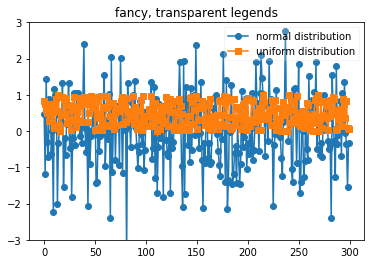

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
fig, ax = plt.subplots(1)
ax.plot(np.random.randn(300), 'o-', label='normal distribution')
ax.plot(np.random.rand(300), 's-', label='uniform distribution')
ax.set_ylim(-3, 3)

ax.legend(fancybox=True, framealpha=0.2)
ax.set_title('fancy, transparent legends')

plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

data_base_dir = '../../datasets/Movielens/'
data_dir2 = data_base_dir + 'Movielens Latest/ml-latest/'
data_dir = data_base_dir + 'ml-20m/'

genome_scores = data_dir2 + 'genome-scores.csv'
genome_tags = data_dir + 'genome-tags.csv'
movies = data_dir + 'movies.csv'
ratings = data_dir + 'ratings.csv'
tags = data_dir + 'tags.csv'
genres = data_dir + 'u.genre'


user_full_genome_vector_df = pd.read_pickle(data_dir + 'output/user_full_genome_terms_df_gzip', compression='gzip')
user_lemmatized_genome_vector_df = pd.read_pickle(data_dir + 'output/user_lemmatized_genome_terms_df_gzip', compression='gzip')

movie_full_genome_scores_df = pd.read_csv(genome_scores).pivot(index='movieId', columns='tagId', values='relevance')
movie_lemmatized_genome_scores_df = pd.read_pickle(data_dir + 'output/movies_lemmatized_genome_vector_df_bz2', compression='bz2')

In [4]:
from sklearn.metrics import pairwise_distances

def evaluate_recommendations(user_id, recommendation_list, N_size, movie_genome_scores_df, user_genome_terms_df):
    movie_genomes_df = movie_genome_scores_df.loc[recommendation_list, :]
    user_vector_df = user_genome_terms_df.loc[user_id, :].values.reshape(1, -1)

    model_pairwise_scores_df = pd.DataFrame(index=recommendation_list)
    model_pairwise_scores_df['similarity'] = pairwise_distances(user_vector_df, movie_genomes_df.values, metric='cosine').reshape(-1, 1)
    model_pairwise_scores_df['diversity'] = 1 - model_pairwise_scores_df['similarity']
    
    all_movies = model_pairwise_scores_df.index.values
    movie_genomes_df = movie_genome_scores_df.loc[all_movies, :]

    # calculating diversity of a list (1-SIM_ij)
    intra_list_distances_df = pd.DataFrame(1 - pairwise_distances(movie_genomes_df.values, movie_genomes_df.values, metric='cosine'), index=all_movies, columns=all_movies)
    diversity_of_list = intra_list_distances_df.sum(axis=1).sum() * (1/(N_size * (N_size -1)))
    similarity_of_list = 1 - diversity_of_list
    
    average_similarity = model_pairwise_scores_df['similarity'].mean()
    average_diversity = model_pairwise_scores_df['diversity'].mean()
    
    print("diversity_of_list: ", diversity_of_list)
    print("similarity_of_list: ", similarity_of_list)
    print("average_diversity: ", average_diversity)
    print("average_similarity: ", average_similarity)
    
    return diversity_of_list, similarity_of_list, average_diversity, average_similarity

In [9]:
main_model_lemmatized = [8125, 25930, 1927, 26122, 559, 5151, 59022, 101281, 50189, 5781, 6550, 85367, 7239, 6036, 72407, 94677, 44193, 74752, 104441, 80363]
genre_binary = [100553,    913,   1147,   1189  , 2859, 120478,   2066   ,7156,   1361  , 3077,8228  , 3677   , 246 , 32853 , 58425 ,  6896,  85774  , 7566    ,602    ,162]
genre_integer=[100553,    913,   1147   , 1189   , 2859 ,120478  , 2066  , 7156,   1361,   3077, 8228 ,  3677,    246  , 32853  , 58425  , 6896  ,85774   ,7566,602, 162]
genome_lemmatized=[  1315 ,115414,  27114   ,3804 ,110809  ,74075,   6036,   3216, 104736,  73106, 59429   ,5687 , 77414   ,4872  , 3691   ,2894  , 6037,   2234  ,  559, 111387]
genome_full = [  1315,  77414,   5687,  27114,  43930,  88108,   8911, 104736,  95199,  78264, 26791, 115414,  74154 , 65193, 110771,  31433,  63393 ,109189   ,8869,54734]

user_id = 1
N_size = 20
# (user_id, recommendation_list, N_size, movie_genome_scores_df, user_genome_terms_df):
print("\nMain Model Genome Lemmatized:\n")
evaluate_recommendations(user_id, main_model_lemmatized, N_size, movie_lemmatized_genome_scores_df, user_lemmatized_genome_vector_df)
print("\nBaseline Genome Lemmatized:\n")
evaluate_recommendations(user_id, genome_lemmatized, N_size, movie_full_genome_scores_df, user_full_genome_vector_df)
print("\nBaseline Genre Binary:\n")
evaluate_recommendations(user_id, genre_binary, N_size, movie_full_genome_scores_df, user_full_genome_vector_df)
# evaluate_recommendations(user_id, )

diversity_of_list:  0.6774592991028322
similarity_of_list:  0.3225407008971678
average_diversity:  0.7121624637908288
average_similarity:  0.28783753620917113



diversity_of_list:  0.6164126378942775
similarity_of_list:  0.38358736210572253
average_diversity:  0.5877269090114281
average_similarity:  0.41227309098857184



diversity_of_list:  0.8067971823680207
similarity_of_list:  0.19320281763197933
average_diversity:  0.7749328275655161
average_similarity:  0.22506717243448388


(0.8067971823680207,
 0.19320281763197933,
 0.7749328275655161,
 0.22506717243448388)

In [ ]:
user_id = 1


In [47]:
# average similarity to user
print("average similarity: ", main_model_lemmatized_df['similarity'].mean())
print("average diversity", main_model_lemmatized_df['diversity'].mean())

# diversity of list
all_movies = main_model_lemmatized_df.index.values
movie_genomes_df = movie_lemmatized_genome_scores_df.loc[all_movies, :]
m_distances_df = pd.DataFrame(1 - pairwise_distances(movie_genomes_df.values, movie_genomes_df.values, metric='cosine'), index=all_movies, columns=all_movies)
m_distances_df

average similarity:  0.28783753620917113
average diversity 0.7121624637908288


,8125,25930,1927,26122,559,5151,59022,101281,50189,5781,6550,85367,7239,6036,72407,94677,44193,74752,104441,80363
8125,1.000000,0.914699,0.778498,0.855931,0.531202,0.489858,0.480813,0.510782,0.475585,0.493057,0.457234,0.492586,0.502578,0.474824,0.443494,0.490532,0.471785,0.484804,0.543943,0.450181
25930,0.914699,1.000000,0.835283,0.851746,0.538823,0.503985,0.493479,0.518308,0.490295,0.503819,0.482124,0.475183,0.508486,0.486375,0.422173,0.511122,0.464607,0.499075,0.580670,0.435777
1927,0.778498,0.835283,1.000000,0.790922,0.500389,0.499262,0.500429,0.495426,0.493473,0.509422,0.461780,0.472342,0.513635,0.487286,0.486959,0.503496,0.483235,0.492160,0.517818,0.446362
26122,0.855931,0.851746,0.790922,1.000000,0.622811,0.541394,0.521452,0.514121,0.533021,0.567767,0.477671,0.479708,0.489905,0.527962,0.419408,0.532576,0.467667,0.553115,0.579825,0.442220
559,0.531202,0.538823,0.500389,0.622811,1.000000,0.787922,0.704093,0.611525,0.833406,0.849017,0.532390,0.575734,0.488205,0.849203,0.516642,0.614756,0.565861,0.730266,0.647981,0.528691
5151,0.489858,0.503985,0.499262,0.541394,0.787922,1.000000,0.846220,0.836200,0.922441,0.877586,0.758261,0.857062,0.533218,0.850184,0.682315,0.813153,0.841132,0.835293,0.641982,0.617971
59022,0.480813,0.493479,0.500429,0.521452,0.704093,0.846220,1.000000,0.775254,0.860303,0.764408,0.793824,0.769867,0.527956,0.734871,0.610615,0.887905,0.724775,0.816395,0.584914,0.622118
101281,0.510782,0.518308,0.495426,0.514121,0.611525,0.836200,0.775254,1.000000,0.718032,0.654225,0.793809,0.909501,0.496330,0.648761,0.592314,0.816602,0.772410,0.697263,0.537433,0.531063
50189,0.475585,0.490295,0.493473,0.533021,0.833406,0.922441,0.860303,0.718032,1.000000,0.916212,0.699528,0.710823,0.515835,0.918221,0.632981,0.768065,0.768164,0.837246,0.619920,0.595327
5781,0.493057,0.503819,0.509422,0.567767,0.849017,0.877586,0.764408,0.654225,0.916212,1.000000,0.651243,0.653852,0.525553,0.930957,0.672872,0.687357,0.766882,0.833696,0.646028,0.585484


In [48]:
# diversity of a list
m_distances_df.sum(axis=1).sum() * (1/(20 * 19))

0.6774592991028322

In [10]:
experimental_users_list=  [9, 10, 11, 12, 13, 14]
results_dict = {'main_model_lemmatized': [[6132, 64037, 112091, 5891, 50189, 96691, 6036, 6775, 5781, 1862, 559, 3472, 113345, 4982, 74154, 6599, 112091, 34150, 109189, 8785], [8675, 33750, 8608, 5919, 108778, 104441, 64037, 85367, 45635, 81751, 5363, 27564, 72407, 101281, 6550, 108981, 108727, 1116, 97744, 3272], [106072, 70336, 6564, 72378, 5781, 63, 3472, 559, 44193, 59022, 96691, 1862, 50189, 6036, 112091, 113345, 92264, 2557, 5153, 7439], [1939, 1936, 1933, 3808, 96691, 113345, 5781, 3472, 108778, 559, 1862, 112091, 69526, 44193, 6036, 112370, 50189, 86835, 80363, 3847], [1939, 1936, 1933, 3808, 5781, 44193, 108778, 3472, 559, 1862, 3847, 96691, 113345, 50189, 6036, 112091, 63992, 92264, 64037, 95543], [31030, 51638, 1939, 1936, 3847, 3472, 80363, 64037, 108778, 5781, 559, 50189, 6550, 1862, 69526, 108727, 3216, 113345, 78467, 87520]], 'main_model_full': [[64037, 6132, 4752, 4645, 96691, 44193, 6775, 3472, 6144, 80860, 39441, 701, 4069, 6041, 48600, 49286, 56949, 88950, 8785, 2632], [80363, 72407, 108778, 33815, 5363, 55232, 5157, 66639, 6748, 5717, 81751, 5189], [113345, 106072, 27618, 102125, 3472, 44193, 96691, 4069, 4887, 113345, 27664, 102072, 108778, 66639, 92264, 86835, 559, 8142, 36519, 95543], [64114, 6450, 111249, 94018, 96691, 108778, 44193, 3472, 69526, 559, 113345, 86835, 102072, 6775, 66639, 112370, 127298, 5351, 27664, 3216], [6264, 101076, 87520, 27618, 108778, 44193, 3472, 4069, 559, 96691, 102072, 66639, 3216, 5351, 92264, 64037, 5620, 86835, 8911, 27664], [4310, 102072, 3472, 44193, 3847, 92206, 108778, 69526, 5951, 3216, 5269, 8785]], 'baseline_genre_binary': [[127206, 50, 904, 750, 1212, 1198, 3030, 100553, 1284, 5618, 1252, 1260, 260, 1196, 913, 2571, 950, 1248, 1148, 4226], [3037, 7210, 4329, 82459, 2921, 3074, 2401, 6429, 3311, 5440, 8334, 3487, 5435, 6617, 31485, 25938, 6409, 44168, 6356, 5199], [100553, 913, 1147, 1189, 120478, 2066, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 1258, 602, 162, 96606, 80906, 7096], [100553, 913, 1147, 1189, 120478, 2066, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 602, 162, 96606, 80906, 7096, 114635], [100553, 1284, 913, 1147, 1189, 2859, 120478, 2066, 942, 2726, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 602, 162], [2066, 4426, 7335, 5169, 746, 3292, 1154, 1153, 3380, 5795, 72090, 91697, 99444, 110510, 913, 2726, 4432, 5017, 2612, 7943]], 'baseline_genre_int': [[127206, 50, 904, 750, 1212, 1198, 3030, 100553, 1284, 5618, 1252, 1260, 260, 1196, 913, 2571, 950, 1248, 1148, 4226], [3037, 7210, 4329, 82459, 2921, 3074, 2401, 6429, 3311, 5440, 8334, 3487, 5435, 6617, 31485, 25938, 6409, 44168, 6356, 5199], [100553, 913, 1147, 1189, 120478, 2066, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 1258, 602, 162, 96606, 80906, 7096], [100553, 913, 1147, 1189, 120478, 2066, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 602, 162, 96606, 80906, 7096, 114635], [100553, 1284, 913, 1147, 1189, 2859, 120478, 2066, 942, 2726, 1361, 3077, 8228, 3677, 246, 58425, 85774, 7566, 602, 162], [2066, 4426, 7335, 5169, 746, 3292, 1154, 1153, 3380, 5795, 72090, 91697, 99444, 110510, 3037, 7210, 4329, 82459, 2921, 3074]], 'baseline_genome_lemmatized': [[4271, 5687, 6107, 33750, 1315, 77833, 50619, 31702, 2933, 2669, 6818, 26246, 101207, 26231, 3670, 5794, 58876, 1534, 5614, 6123], [115414, 74075, 104312, 110809, 73106, 3216, 3804, 39421, 59429, 92938, 3691, 53464, 6036, 87430, 559, 77414, 4974, 51077, 7317, 2894], [1315, 4271, 5687, 50619, 3216, 26231, 6107, 33750, 77833, 4872, 2933, 31702, 6818, 26241, 1534, 5794, 2669, 108778, 26246, 27114], [3216, 26231, 26241, 1315, 50619, 4872, 2894, 108981, 559, 5687, 7024, 4271, 5351, 5794, 3804, 7976, 6036, 3621, 69134, 110809], [3216, 26231, 26241, 4271, 50619, 1315, 5687, 2894, 559, 108981, 7024, 4872, 5794, 5351, 3472, 3621, 3804, 69134, 4752, 6036], [3216, 26241, 64037, 5891, 2894, 26231, 559, 4752, 7024, 108981, 4872, 3804, 5569, 7976, 6132, 3272, 69134, 1315, 3472, 495]], 'baseline_genome_full': [[5687, 1315, 1534, 2933, 4271, 5614, 3242, 50619, 5351, 2632, 787, 3687, 26743, 33750, 6160, 6123, 4237, 33124, 4347, 6107], [104312, 115414, 74075, 77414, 110809, 97785, 43930, 3216, 5413, 5687, 96691, 1315, 54734, 63393, 80363, 3687, 39421, 88108, 5351, 73106], [5687, 1315, 1534, 2933, 4271, 50619, 5614, 27114, 4884, 5351, 2632, 5473, 3216, 3242, 787, 47274, 33124, 33750, 6599, 4237], [5687, 1315, 5351, 3216, 1534, 4271, 50619, 2632, 2933, 4752, 3242, 3621, 5413, 4884, 3472, 26231, 7024, 5473, 872, 26241], [5687, 1315, 4271, 5351, 3216, 1534, 2632, 50619, 2933, 5413, 3242, 3621, 4752, 3472, 872, 26231, 26241, 5794, 4884, 7024], [4752, 5413, 5687, 3216, 6132, 5891, 5717, 8906, 1315, 7024, 3621, 3472, 5351, 5569, 3652, 4271, 96691, 4884, 3344, 1534]]}
results_dict.keys()

dict_keys(['main_model_lemmatized', 'main_model_full', 'baseline_genre_binary', 'baseline_genre_int', 'baseline_genome_lemmatized', 'baseline_genome_full'])

In [ ]:
# experimental_users_list
for user in experimental_users_list:
    for model in results_dict:
        evaluate_recommendations(user_id, main_model_lemmatized, N_size, movie_lemmatized_genome_scores_df, user_lemmatized_genome_vector_df)